# Uploading Tables to SQL

In [2]:
import pandas as pd
import sqlite3

aenlocs = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/maticic-del-dm3769/AeneidPlacesFinalProject/AeneidPlacesSpreadsheet.csv")
pleiades = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/maticic-del-dm3769/AeneidPlacesFinalProject/pleiades-places.csv")

In [2]:
conn = sqlite3.connect(':memory:')

In [3]:
aenlocs.to_sql('aenlocs', conn, if_exists="replace")
pleiades.to_sql('pleiades', conn, if_exists="replace")

# this step alerted me to the fact that there were 
# added spaces in my table. I had to go through and 
# remove them, for example, from the end of text in cells

In [4]:
# to remind myself what my table names are in aenlocs...
pd.read_sql("""PRAGMA table_info(aenlocs)""",conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Pleiades_ID,INTEGER,0,None,0
2,2,Name,TEXT,0,None,0
3,3,Line,INTEGER,0,None,0
4,4,Order_in_text,INTEGER,0,None,0
5,5,Aeneas_Path,REAL,0,None,0
6,6,Gods,REAL,0,None,0
7,7,Wheres_Aeneas,TEXT,0,None,0
8,8,GodVisiting,TEXT,0,None,0
9,9,Noun_or_modifier,TEXT,0,None,0


In [8]:
# and pleiades
pd.read_sql("""PRAGMA table_info(pleiades)""",conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,authors,TEXT,0,None,0
2,2,bbox,TEXT,0,None,0
3,3,connectsWith,TEXT,0,None,0
4,4,created,TEXT,0,None,0
5,5,creators,TEXT,0,None,0
6,6,currentVersion,INTEGER,0,None,0
7,7,description,TEXT,0,None,0
8,8,extent,TEXT,0,None,0
9,9,featureTypes,TEXT,0,None,0


# Step 1: Some preliminary queries

In [1]:
# I want a list of the distinct place names as they occur in book 1
pd.read_sql("""select aenlocs.name, pleiades.reprlat, pleiades.reprlong 
from aenlocs, pleiades 
where aenlocs.pleiades_id = pleiades.id
order by aenlocs.poem and aenlocs.book""", conn)


NameError: name 'pd' is not defined

# Detour to update Dataframe

In [5]:
# Here I realized that my column aenlocs.order_in_text is redundant, since I can use 
# aenlocs.line to find the order the name comes in the text. So I want to remove this 
# redundant column from my dataframe. I also removed it from my .csv. 
aenlocs = aenlocs.drop('Order_in_text', axis=1)


In [215]:
# I think the problem is that my columns don't have headers. Let's add some. 
aenlocs.columns = ['Pleiades_ID', 'Name', 'Line', 'Order_in_text', 'Aeneas_Path', 'Gods', 'Wheres_Aeneas', 'GodVisiting', 'Noun_or_modifier', 'Modified', 'Adjective', 'Original_form', 'Direct_Speech', 'Place_coordination_in_sentence', 'Y','Z']



ValueError: Length mismatch: Expected axis has 15 elements, new values have 16 elements

In [6]:
pd.read_sql("""PRAGMA table_info(aenlocs)""",conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Pleiades_ID,INTEGER,0,None,0
2,2,Name,TEXT,0,None,0
3,3,Line,INTEGER,0,None,0
4,4,Order_in_text,INTEGER,0,None,0
5,5,Aeneas_Path,REAL,0,None,0
6,6,Gods,REAL,0,None,0
7,7,Wheres_Aeneas,TEXT,0,None,0
8,8,GodVisiting,TEXT,0,None,0
9,9,Noun_or_modifier,TEXT,0,None,0


In [7]:
# It looks like the column was removed after all and I just wasted an hour an a half. 
# I think what happend was that my original mistake was not capitalizing Order_in_text. At one point I did 
# capitalize it and actually removed it. But then when going back through to demonstrate what I did, 
# I assumed that the pragma query above would show if it was removed.
aenlocs.head(2)

,Pleiades_ID,Name,Line,Aeneas_Path,Gods,Wheres_Aeneas,GodVisiting,Noun_or_modifier,Modified,Adjective,Original_form,Direct_Speech,Place_coordination_in_sentence,Y,Z
0,550595,Troy,1,NaN,NaN,Introduction,NaN,genitive_singular,orae,NaN,Troiae_oris,NaN,from_x_to_y_and_z,Italy,Lavinium
1,1052,Italy,2,NaN,NaN,Introduction,NaN,nominative,NaN,NaN,Italiam,NaN,from_y_to_x,Troy,NaN


In [95]:
aenlocs.to_sql('aenlocs', conn, if_exists="replace")

# Some preliminary tables

In [8]:
# Again, the table of distinct place names in order of their first occurence
pd.read_sql("""select distinct aenlocs.name, pleiades.reprlat, pleiades.reprlong 
from aenlocs, pleiades 
where aenlocs.pleiades_id = pleiades.id 
order by aenlocs.line""", conn)

,Name,reprLat,reprLong
0,Troy,39.955801,26.251822
1,Italy,42.500000,12.500000
2,Lavinium,41.664474,12.480721
3,Latium,41.790900,12.762100
4,AlbaLonga,41.746447,12.650480
5,Rome,41.891737,12.486168
6,Carthage,36.848372,10.323408
7,Ostia,41.753999,12.289323
8,Samos,37.730000,26.840000
9,Tyre,33.269847,35.203843


In [9]:
# A list of distinct nouns that stand in metonymy for places
pd.read_sql("""select distinct aenlocs.modified
from aenlocs 
where aenlocs.modified != 'None' 
order by aenlocs.line""", conn) # "where aenlocs.modified != 'None'" is a lazy way of getting around the fact  
# that pandas is nothandling blank cells they way I want it to, but I am running out of time this week and  
# will figure this problem out later. 

,Modified
0,orae
1,litora
2,patres
3,moenia
4,ostia
5,arces
6,excidium
7,tellus
8,aequor
9,litus


In [10]:
# The places Aeneas mentions vs. the places Dido and the gods mention in direct speech
pd.read_sql("""select distinct aenlocs.name, pleiades.reprlat, pleiades.reprlong
from aenlocs, pleiades
where aenlocs.direct_speech = 'Aeneas' and aenlocs.pleiades_id = pleiades.id
order by aenlocs.name""", conn)

,Name,reprLat,reprLong
0,Aegean_Sea,37.403266,25.842291
1,Asia,39.640147,31.033255
2,Cyclopean_Rocks,37.560405,15.164150
3,Europe,40.946148,22.111673
4,Italia,42.500000,12.500000
5,Italy,42.500000,12.500000
6,Latium,41.790900,12.762100
7,Libya,31.500000,26.500000
8,Strait_of_Messina,38.253702,15.715194
9,Troy,39.955801,26.251822


In [11]:
pd.read_sql("""select distinct aenlocs.name, pleiades.reprlat, pleiades.reprlong
from aenlocs, pleiades
where aenlocs.direct_speech = 'Dido' and aenlocs.pleiades_id = pleiades.id
order by aenlocs.name""", conn)
# Interestingly, we see that she never mentions Rome or mainland Italy.

,Name,reprLat,reprLong
0,Cyprus,35.040214,33.270105
1,Sidon,33.560328,35.373240
2,Simoeis,39.750000,26.250000
3,Troy,39.955801,26.251822


In [12]:
pd.read_sql("""select distinct aenlocs.name, pleiades.reprlat, pleiades.reprlong
from aenlocs, pleiades
where aenlocs.pleiades_id = pleiades.id and aenlocs.direct_speech = 'Venus' or 'Jupiter' or 'VenustoCupid' 
order by aenlocs.name""", conn)

,Name,reprLat,reprLong
0,Byrsa,40.182899,29.063819
1,Carthage,36.848372,10.323408
2,Ilyria,41.500000,19.500000
3,Italy,42.500000,12.500000
4,Liburnia,44.105993,15.153360
5,Libya,31.500000,26.500000
6,Padua,45.409561,11.876975
7,Timavus_Mouth,44.281953,14.738023
8,Tyre,33.269847,35.203843


# Some Charts and maps

In [13]:
name = aenlocs['Name'].dropna()
modified = aenlocs['Modified'].dropna()

In [14]:
name.groupby(name).count().sort_values().plot.bar()

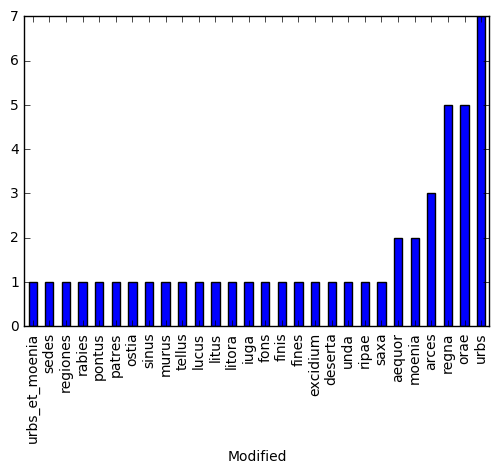

In [170]:
modified.groupby(modified).count().sort_values().plot.bar()

In [15]:
# This shows how land forms  get modified. I realize I also 
# need a column for the Latin form of the proper name in 
# addition to its description and translation.
aenlocs.groupby(['Modified','Noun_or_modifier','Name']).size()

Modified        Noun_or_modifier   Name             
aequor          adjective          Aegean_Sea           1
                                   Tyrrhenian_Sea       1
arces           adjective          Tyre                 1
                genitive_singular  Carthage             2
deserta         genitive_singular  Libya                1
excidium        genitive_singular  Libya                1
fines           adjective          Libya                1
finis           genitive_singular  Sicily               1
fons            genitive_singular  Timavus_Mouth        1
iuga            genitive_singular  Cynthus_Mt           1
litora          adjective          Lavinium             1
litus           adjective          Siciliy              1
lucus           genitive_singular  Idalium(Cyprus?)     1
moenia          genitive_singular  Rome                 1
                                   Troy                 1
murus           adjective          Troy                 1
orae            adj

In [16]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# I have to footnote Mikael for helping me install basemap. 


In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = (8,6)

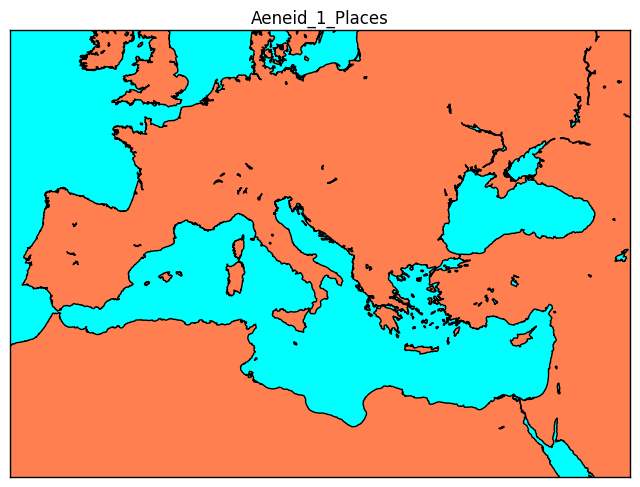

In [93]:
# I want to map the coordinates of each distinct place mentioned in Aeneid 1

aencoords = Basemap(llcrnrlon=-6.7, llcrnrlat=25,
    urcrnrlon=51.6, urcrnrlat=51.6, resolution='i',projection='cass', lon_0=16.5,lat_0=42) 
# I consciously decided not to set area_thresh because I preferred the mpa with all the land features.
# Ideally, I want to create maps
# centered on Rome, but this is just a first draft so it is centered to the NE in the Adriatic. 
aencoords.drawcoastlines()
aencoords.fillcontinents(color='coral',lake_color='aqua')
aencoords.drawmapboundary(fill_color='aqua')
plt.title("Aeneid_1_Places")
plt.show()



In [70]:
aencoordlist = pd.read_sql("""select distinct aenlocs.name, pleiades.reprlat, pleiades.reprlong 
from aenlocs, pleiades 
where aenlocs.pleiades_id = pleiades.id 
order by aenlocs.line""", conn)

aencoordlist.to_csv('coords.csv')




In [71]:
aencoordlist.head

<bound method NDFrame.head of                  Name    reprLat   reprLong
0                Troy  39.955801  26.251822
1               Italy  42.500000  12.500000
2            Lavinium  41.664474  12.480721
3              Latium  41.790900  12.762100
4           AlbaLonga  41.746447  12.650480
5                Rome  41.891737  12.486168
6            Carthage  36.848372  10.323408
7               Ostia  41.753999  12.289323
8               Samos  37.730000  26.840000
9                Tyre  33.269847  35.203843
10              Libya  31.500000  26.500000
11              Argos  37.682160  22.719182
12            Siciliy  37.472310  14.258442
13             Aeolia  38.579810  14.882420
14     Tyrrhenian_Sea  41.721562  11.927429
15              Ilium  39.955801  26.251822
16             Syrtes  31.500000  18.000000
17  Strait_of_Messina  38.253702  15.715194
18    Cyclopean_Rocks  37.560405  15.164150
19             Ilyria  41.500000  19.500000
20           Liburnia  44.105993  15.153360
21

In [87]:
## import csv 

lat, lon = [],[]
with open ('coords.csv') as C:
    reader = csv.reader(C)
    next(reader)
    for row in reader:
        lat.append(float(row[2]))
        lon.append(float(row[3]))

In [ ]:
coords = np.genfromtxt("coords.csv",
        delimiter=',', 
        dtype=[('lat', np.float32), ('lon', np.float32)], 
        usecols=(2, 3))

In [89]:
lon

[26.2518225,
 12.5,
 12.4807205,
 12.7621,
 12.65048,
 12.4861685,
 10.32340778,
 12.28932254,
 26.84,
 35.2038435,
 26.5,
 22.719182,
 14.258442358,
 14.882419500000001,
 11.927429101300001,
 26.2518225,
 18.0,
 15.715194,
 15.1641505,
 19.5,
 15.153359925,
 14.738023499999999,
 11.876975,
 22.633767199999998,
 22.75557475,
 29.0638185,
 12.5,
 25.8422909735,
 22.111673,
 31.0332545347,
 32.4364476667,
 26.2518225,
 22.333493100000002,
 25.271110999999998,
 14.258442358,
 18.0,
 26.25,
 35.37324,
 33.2701051552,
 22.9770456,
 33.2701051552]

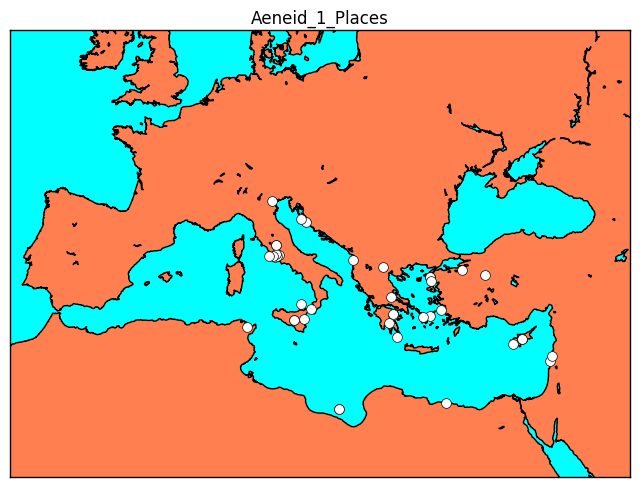

In [53]:
x, y = aencoords(lon, lat)
aencoords.plot(x, y, 'o', color='white', markersize=7)
aencoords.drawcoastlines()
aencoords.fillcontinents(color='coral',lake_color='aqua')
aencoords.drawmapboundary(fill_color='aqua')
plt.title("Aeneid_1_Places")
plt.show()
fig = plt.figure()

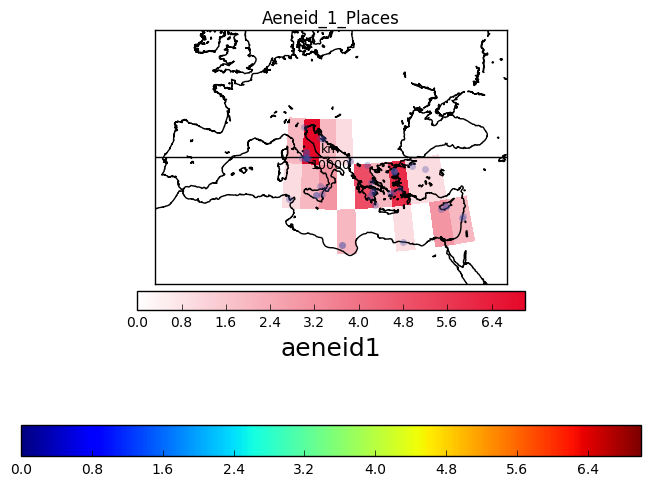

In [136]:
from matplotlib.colors import LinearSegmentedColormap

nx, ny = 10, 3
db = 1
lon_bins = np.linspace(min(lon)-db, max(lon)+db, nx+1) # 10 bins
lat_bins = np.linspace(min(lat)-db, max(lat)+db, ny+1) # 13 bins

density, _, _ = np.histogram2d(lat, lon, [lat_bins, lon_bins])

lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

# convert the bin mesh to map coordinates:
xs, ys = aencoords(lon_bins_2d, lat_bins_2d)

plt.pcolormesh(xs, ys, density) 
plt.colorbar(orientation='horizontal')

# now I'll change the colors

cdict = {'red':  ( (0.0,  1.0,  1.0),
                   (1.0,  0.9,  1.0) ),
         'green':( (0.0,  1.0,  1.0),
                   (1.0,  0.03, 0.0) ),
         'blue': ( (0.0,  1.0,  1.0),
                   (1.0,  0.16, 0.0) ) }

custom_map = LinearSegmentedColormap('custom_map', cdict)
plt.register_cmap(cmap=custom_map)
plt.pcolormesh(xs, ys, density, cmap="custom_map")

cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('aeneid1',size=18)

# Here, I'm adding a scatter plot on top of the 2D histogram
x,y = aencoords(lon, lat) 
aencoords.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#424FA4',markeredgecolor="none", alpha=0.33)

aencoords.drawmapscale(16.5, 42, 16.5, 42, 10000, barstyle='simple', yoffset=20000)

aencoords.drawcoastlines()
plt.title("Aeneid_1_Places")
plt.show()

# making the image larger...
plt.gcf().set_size_inches(50,50)

plt.show(custom_map)

# my chart is stuck within a chart...

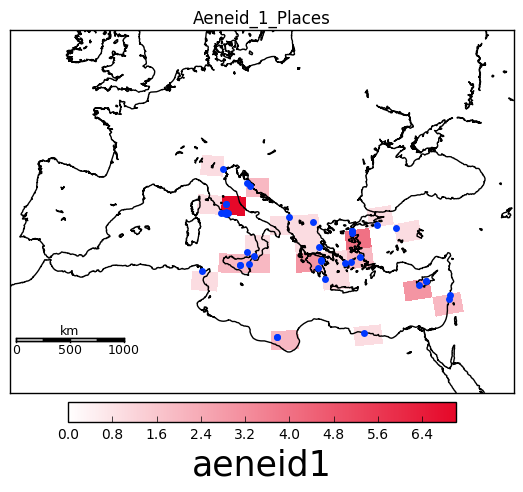

In [157]:
#I had to remove these two to free my chart
# plt.pcolormesh(xs, ys, density) 
# plt.colorbar(orientation='horizontal')

from matplotlib.colors import LinearSegmentedColormap

nx, ny = 10, 10
db = 1
lon_bins = np.linspace(min(lon)-db, max(lon)+db, nx+1) # 10 bins
lat_bins = np.linspace(min(lat)-db, max(lat)+db, ny+1) # 13 bins

density, _, _ = np.histogram2d(lat, lon, [lat_bins, lon_bins])

lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

# convert the bin mesh to map coordinates:
xs, ys = aencoords(lon_bins_2d, lat_bins_2d)

cdict = {'red':  ( (0.0,  1.0,  1.0),
                   (1.0,  0.9,  1.0) ),
         'green':( (0.0,  1.0,  1.0),
                   (1.0,  0.03, 0.0) ),
         'blue': ( (0.0,  1.0,  1.0),
                   (1.0,  0.16, 0.0) ) }

custom_map = LinearSegmentedColormap('custom_map', cdict)
plt.register_cmap(cmap=custom_map)
plt.pcolormesh(xs, ys, density, cmap="custom_map")

cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('aeneid1',size=25)

# Here, I'm adding a scatter plot on top of the 2D histogram
x,y = aencoords(lon, lat) 
aencoords.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#0037ff',markeredgecolor="none")

#add a scale bar
aencoords.drawmapscale(-2, 30, -2, 30, 1000, barstyle='fancy', yoffset=20000)

# now overlaying my map onto the plots
aencoords.drawcoastlines()
plt.title("Aeneid_1_Places")
plt.show()

# making the image larger...
plt.gcf().set_size_inches(50,50)

plt.show(custom_map)

